# Final Best Model Evaluation - Test Set

In this notebook, we take the best models from each of our experimentations and optimizations to evaluate which model performs the best on the testing set

### Importing data

In [26]:
import pandas as pd
df_test = pd.read_csv('https://media.githubusercontent.com/media/leahhkim/final_project_analyticsII/refs/heads/main/Data/nvss_test.csv')
df_test.head()

,mager14,mar,meduc,mbrace,umhisp,lbo,tbo,precare_rec,previs_rec,wtgain_rec,...,ca_menin,ca_heart,ca_ompha,ca_gastro,ca_limb,ca_cleftlp,ca_cleft,ca_downs,ca_chrom,infant_death
0,7,2,4.0,2.0,0,1,2,2.0,5,3,...,0,0,0,0,0,0,0,1,1,0
1,9,2,4.0,1.0,0,3,3,2.0,6,5,...,0,0,0,0,0,0,0,1,1,0
2,6,1,3.0,1.0,0,1,1,1.0,9,5,...,0,0,0,0,0,0,0,1,1,0
3,10,1,2.0,1.0,0,3,3,1.0,11,1,...,0,0,0,0,0,0,0,1,1,0
4,8,1,2.0,1.0,1,1,1,5.0,12,3,...,0,0,0,0,0,0,0,1,1,0


### Loading saved model weights from models

In [27]:
import joblib

# load the best XGBoost model
xgb_best_model = joblib.load('/content/xgb_best_model.joblib')
print('Loaded xgb_best_model')

# load the Lasso model
lasso_model = joblib.load('/content/lasso_model.joblib')
print('Loaded lasso_model')

# load the best SVM model
svm_best_model = joblib.load('/content/svm_best_model.joblib')
print('Loaded svm_best_model')

# load the Elastic Net model
elastic_model = joblib.load('/content/elastic_model.joblib')
print('Loaded elastic_model')

# load the Ridge model
ridge_model = joblib.load('/content/ridge_model (1).joblib')
print('Loaded ridge_model')

Loaded xgb_best_model
Loaded lasso_model
Loaded svm_best_model
Loaded elastic_model
Loaded ridge_model


/usr/lib/python3.12/pickle.py:1760: UserWarning: [08:19:21] WARNING: /workspace/src/gbm/gbtree.cc:377: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  setstate(state)
/usr/lib/python3.12/pickle.py:1760: UserWarning: [08:19:21] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  setstate(state)
/usr/lib/python3.12/pickle.py:1760: UserWarning: [08:19:21] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  setstate(state)


### Evaluate regression, ensemble, and other ML models
- we re-identify the target and feature variables from the imported test dataset
- we calculate the overall accuracy score, produce a classification report for each model, but at the same time, we also calculate the positive case (cases where infants died) accuracy score to see which models truly perform the best

In [28]:
X = df_test.drop('infant_death', axis=1)
y = df_test['infant_death']

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# choose test features and labels
X_test_input = X
y_true_test = y.astype(int).to_numpy().ravel()

# xgboost
xgb_test_pred = xgb_best_model.predict(X_test_input).astype(int)
acc_xgb = accuracy_score(y_true_test, xgb_test_pred)
pos_acc_xgb = (xgb_test_pred[y_true_test == 1] == 1).mean()

print("XGBoost on test set")
print(f"Overall accuracy: {acc_xgb:.4f}")
print(f"Accuracy for infant_death=1: {pos_acc_xgb:.4f}")
print(classification_report(y_true_test, xgb_test_pred))

# lasso with 0.5 threshold
lasso_test_pred_scores = lasso_model.predict(X_test_input)
lasso_test_pred = (lasso_test_pred_scores > 0.5).astype(int)
acc_lasso = accuracy_score(y_true_test, lasso_test_pred)
pos_acc_lasso = (lasso_test_pred[y_true_test == 1] == 1).mean()

print("\nLasso on test set")
print(f"Overall accuracy: {acc_lasso:.4f}")
print(f"Accuracy for infant_death=1: {pos_acc_lasso:.4f}")
print(classification_report(y_true_test, lasso_test_pred))

# svm
svm_test_pred = svm_best_model.predict(X_test_input).astype(int)
acc_svm = accuracy_score(y_true_test, svm_test_pred)
pos_acc_svm = (svm_test_pred[y_true_test == 1] == 1).mean()

print("\nSVM on test set")
print(f"Overall accuracy: {acc_svm:.4f}")
print(f"Accuracy for infant_death=1: {pos_acc_svm:.4f}")
print(classification_report(y_true_test, svm_test_pred))

# elastic net with 0.5 threshold
elastic_test_pred_scores = elastic_model.predict(X_test_input)
elastic_test_pred = (elastic_test_pred_scores > 0.5).astype(int)
acc_elastic = accuracy_score(y_true_test, elastic_test_pred)
pos_acc_elastic = (elastic_test_pred[y_true_test == 1] == 1).mean()

print("\nElastic Net on test set")
print(f"Overall accuracy: {acc_elastic:.4f}")
print(f"Accuracy for infant_death=1: {pos_acc_elastic:.4f}")
print(classification_report(y_true_test, elastic_test_pred))

# ridge with 0.5 threshold
ridge_test_pred_scores = ridge_model.predict(X_test_input)
ridge_test_pred = (ridge_test_pred_scores > 0.5).astype(int)
acc_ridge = accuracy_score(y_true_test, ridge_test_pred)
pos_acc_ridge = (ridge_test_pred[y_true_test == 1] == 1).mean()

print("\nRidge on test set")
print(f"Overall accuracy: {acc_ridge:.4f}")
print(f"Accuracy for infant_death=1: {pos_acc_ridge:.4f}")
print(classification_report(y_true_test, ridge_test_pred))


XGBoost on test set
Overall accuracy: 0.9334
Accuracy for infant_death=1: 0.7681
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    708705
           1       0.06      0.77      0.12      4179

    accuracy                           0.93    712884
   macro avg       0.53      0.85      0.54    712884
weighted avg       0.99      0.93      0.96    712884


Lasso on test set
Overall accuracy: 0.9230
Accuracy for infant_death=1: 0.7643
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    708705
           1       0.06      0.76      0.10      4179

    accuracy                           0.92    712884
   macro avg       0.53      0.84      0.53    712884
weighted avg       0.99      0.92      0.95    712884


SVM on test set
Overall accuracy: 0.9955
Accuracy for infant_death=1: 0.2575
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    70870

### Evaluate Neural Network
- Here we load the training set again to ensure that the standscaler that is used to transform the test cases will be the same
- Copy all the preprocessing pipeline from the original neural network script to properly build back the neural network from the best model weights


In [30]:
df_train = pd.read_csv('https://media.githubusercontent.com/media/leahhkim/final_project_analyticsII/refs/heads/main/Data/nvss_train.csv')


### Loading again neural network's architecture and proprocessed tensors
- and producing an intial accuracy outlook

In [31]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

target_col = "infant_death"

# split into features x and target y for each split
X_train = df_train.drop(columns=[target_col]).values.astype("float32")
y_train = df_train[target_col].values.astype("float32")

X_test = df_test.drop(columns=[target_col]).values.astype("float32")
y_test = df_test[target_col].values.astype("float32")


# standardize features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# convert scaled arrays to tensors and move to device
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train, dtype=torch.float32).to(device)

X_test_t  = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_t  = torch.tensor(y_test, dtype=torch.float32).to(device)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            # First hidden layer
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),     # stabilize training
            nn.Dropout(0.2),        # drop 20% of the neurons to reduce overfitting

            # Second hidden layer
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),

            # Third hidden layer
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.2),

            # Output layer
            nn.Linear(16, 1)
        )

    def forward(self, x):
        # Forward pass: return a score for each sample (shape: [batch_size])
        return self.net(x).squeeze(1)

# Create model instance with matching input dimension
input_dim = X_train_t.shape[1]
model = MLP(input_dim).to(device)

# loading the best model weights
state_dict = torch.load("best_mlp_infant_mortality.pt", map_location=device)
model.load_state_dict(state_dict)
model.eval()  # set model to evaluation mode (turns off dropout, uses running stats for BatchNorm)

print("Loaded best model from best_mlp_infant_mortality.pt")

# start calculating metrics for evaluation
with torch.no_grad():
    logits_test = model(X_test_t)
    probs_test = torch.sigmoid(logits_test)
    preds_test = (probs_test >= 0.5).float()

y_test_result = y_test_t.cpu().numpy()
probs_test_result = probs_test.cpu().numpy()
preds_test_result = preds_test.cpu().numpy()

# overall test accuracy: fraction of all test cases the model got right
test_acc = (preds_test_result == y_test_result).mean()

# for babies who actually died (label 1), fraction correctly predicted as 1
test_recall_pos = (
    (preds_test_result[y_test_result == 1] == 1).mean()
    if (y_test_result == 1).sum() > 0
    else float("nan")
)

# ROC-AUC: how often the model gives higher scores to deaths than to survivals
test_auc = roc_auc_score(y_test_result, probs_test_result)

# PR-AUC: when we sort babies by risk score,
# how well the model concentrates real deaths near the top of the list
test_ap  = average_precision_score(y_test_result, probs_test_result)
print("Test accuracy (all cases):", test_acc)
print("Test accuracy for infant_death=1 (out of all deaths, fraction correctly flagged):", test_recall_pos)
print("Test ROC-AUC (how well deaths are ranked above survivals):", test_auc)
print("Test PR-AUC (how well real deaths are placed near the top of the risk ranking):", test_ap)


Using device: cpu
Loaded best model from best_mlp_infant_mortality.pt
Test accuracy (all cases): 0.9193445216893632
Test accuracy for infant_death=1 (out of all deaths, fraction correctly flagged): 0.7815266810241684
Test ROC-AUC (how well deaths are ranked above survivals): 0.9220408162879425
Test PR-AUC (how well real deaths are placed near the top of the risk ranking): 0.49481621394854003


### calculating the same metrics for neural network

In [32]:
from sklearn.metrics import accuracy_score, classification_report
y_true = y_test_t.cpu().numpy()
y_pred = preds_test.cpu().numpy()
y_true = y_true.astype(int).ravel()
y_pred = y_pred.astype(int).ravel()

# recording overall accuracy and death case accuracy for visualization
acc_nn = accuracy_score(y_true, y_pred)
pos_acc_nn = (y_pred[y_true == 1] == 1).mean()
print("Neural Network Evaluation with accuracy metric")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(classification_report(y_true, y_pred))


Neural Network Evaluation with accuracy metric
Accuracy: 0.9193
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    708705
           1       0.05      0.78      0.10      4179

    accuracy                           0.92    712884
   macro avg       0.53      0.85      0.53    712884
weighted avg       0.99      0.92      0.95    712884



### Visualize model accuracies for convenient comparison

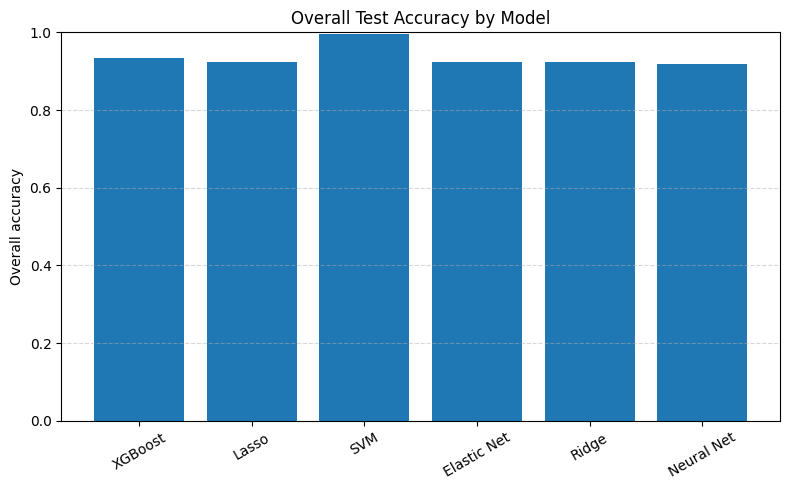

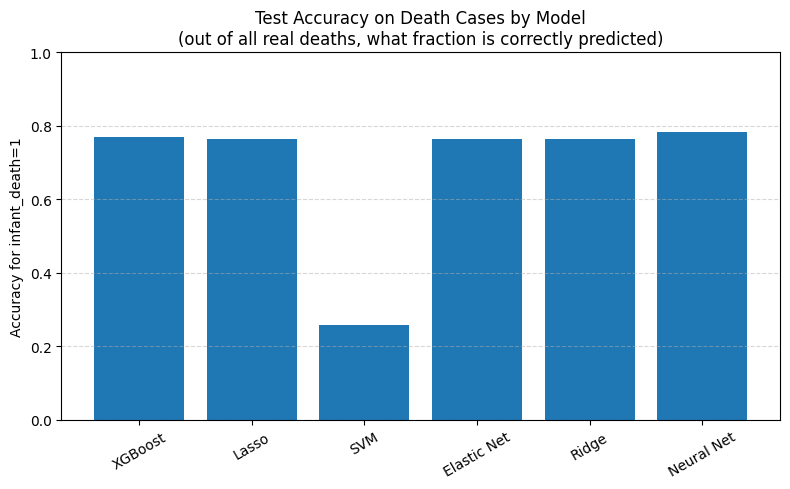

In [33]:
import matplotlib.pyplot as plt

model_names = [
    "XGBoost",
    "Lasso",
    "SVM",
    "Elastic Net",
    "Ridge",
    "Neural Net"
]

overall_accuracies = [
    acc_xgb,
    acc_lasso,
    acc_svm,
    acc_elastic,
    acc_ridge,
    acc_nn
]

death_case_accuracies = [
    pos_acc_xgb,
    pos_acc_lasso,
    pos_acc_svm,
    pos_acc_elastic,
    pos_acc_ridge,
    pos_acc_nn
]

# overall accuracy
plt.figure(figsize=(8, 5))
plt.bar(model_names, overall_accuracies)
plt.ylabel("Overall accuracy")
plt.ylim(0, 1)
plt.title("Overall Test Accuracy by Model")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Accuracy for infant_death=1
plt.figure(figsize=(8, 5))
plt.bar(model_names, death_case_accuracies)
plt.ylabel("Accuracy for infant_death=1")
plt.ylim(0, 1)
plt.title("Test Accuracy on Death Cases by Model\n(out of all real deaths, what fraction is correctly predicted)")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Conclusion
- As we could observe in the above visualization, all models performed great in terms of being extremely accurate on overall predictions
- Nevertheless, as we zoom into looking at which models predicted the most accurate in positive cases (cases where infants did not survive/died), the model that used to almost approach 100% significantly shrinked for this accuracy metric to only 25%. Meanwhile, it appears that neural networks are much better at predicting those rare cases of death out of all the other models.